In [1]:
import os 
os.chdir("C:\\Users\\Pieter-Jan\\Documents\\Work\\Candriam\\nlp\\ESG\\top2Vec\\TopicModelling")

In [2]:
from modules import topic_identify
from random import sample
import pandas as pd
import numpy as np

C:\Users\Pieter-Jan\anaconda3\envs\py38\lib\site-packages\umap\__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [5]:
data = newsgroups_train["data"]

In [21]:
data_sample = sample(data, 3000)

In [22]:
data_sample_df = pd.DataFrame(data_sample, columns=["paragraph"])

In [23]:
model = topic_identify.TopicIdentify(
    documents=data_sample, 
    save_doc_embed=True,
    path_doc_embed="output/distBert_embedding_newsgroup_subset.npy"
)

In [24]:
model.load_sentence_model()
doc_embeddings = model.embedder.encode(data_sample)

In [25]:
np.save("output/distBert_embedding_newsgroup_subset.npy", doc_embeddings)

In [28]:
data_sample_df.to_csv("data/newsgroup_subset.txt", sep="\t")

In [4]:
doc_embeddings = np.load("output/distBert_embedding_newsgroup_subset.npy")

In [24]:
from umap.parametric_umap import ParametricUMAP
import umap
import umap.plot

In [34]:
%%time
embedder = ParametricUMAP(
            n_neighbors=15,
            n_components=2,
            metric="cosine",
            random_state=69
)
embedding = embedder.fit(doc_embeddings)

Epoch 1/10
39/39 [==============================] - 1s 37ms/step - loss: 1.6390
Epoch 2/10
39/39 [==============================] - 1s 32ms/step - loss: 0.4445
Epoch 3/10
39/39 [==============================] - 2s 55ms/step - loss: 0.4194
Epoch 4/10
39/39 [==============================] - 2s 46ms/step - loss: 0.4081
Epoch 5/10
39/39 [==============================] - 2s 54ms/step - loss: 0.3946
Epoch 6/10
39/39 [==============================] - 2s 49ms/step - loss: 0.3828:
Epoch 7/10
39/39 [==============================] - 2s 43ms/step - loss: 0.3760
Epoch 8/10
39/39 [==============================] - 2s 41ms/step - loss: 0.3668
Epoch 9/10
39/39 [==============================] - 1s 35ms/step - loss: 0.3614
Epoch 10/10
39/39 [==============================] - 2s 45ms/step - loss: 0.3582
Wall time: 46.4 s


<AxesSubplot:>

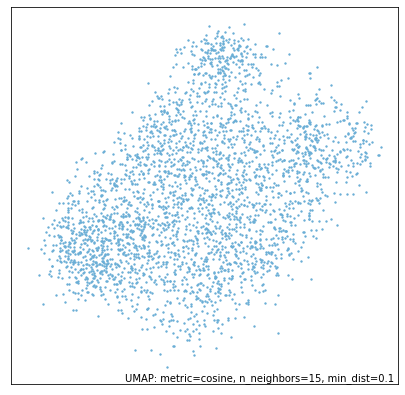

In [35]:
umap.plot.points(embedder, width=500, height=500)

In [31]:
%%time
umap_standard = umap.UMAP(n_neighbors=15,
            n_components=2,
            metric="cosine",
            random_state=69).fit(doc_embeddings)

Wall time: 26.5 s


<AxesSubplot:>

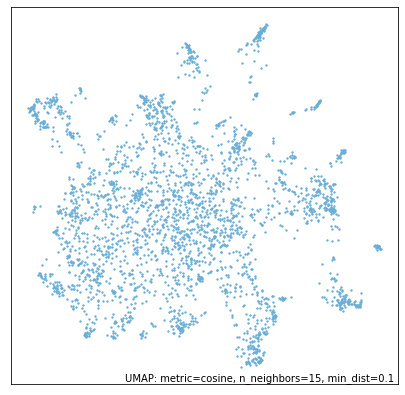

In [32]:
umap.plot.points(umap_standard, width=500, height=500)

In [29]:
%%time
umap_dense = umap.UMAP(densmap=True, 
          n_neighbors=15,
          n_components=2,
          metric="cosine",
          random_state=69).fit(doc_embeddings)

Wall time: 37.7 s


<AxesSubplot:>

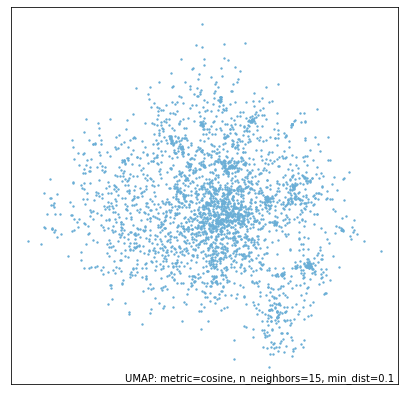

In [30]:
umap.plot.points(umap_dense, width=500, height=500)